In [8]:
"""MC1-P2: Optimize a portfolio.  		   	  			  	 		  		  		    	 		 		   		 		  
  		   	  			  	 		  		  		    	 		 		   		 		  
Copyright 2018, Georgia Institute of Technology (Georgia Tech)  		   	  			  	 		  		  		    	 		 		   		 		  
Atlanta, Georgia 30332  		   	  			  	 		  		  		    	 		 		   		 		  
All Rights Reserved  		   	  			  	 		  		  		    	 		 		   		 		  
  		   	  			  	 		  		  		    	 		 		   		 		  
Template code for CS 4646/7646  		   	  			  	 		  		  		    	 		 		   		 		  
  		   	  			  	 		  		  		    	 		 		   		 		  
Georgia Tech asserts copyright ownership of this template and all derivative  		   	  			  	 		  		  		    	 		 		   		 		  
works, including solutions to the projects assigned in this course. Students  		   	  			  	 		  		  		    	 		 		   		 		  
and other users of this template code are advised not to share it with others  		   	  			  	 		  		  		    	 		 		   		 		  
or to make it available on publicly viewable websites including repositories  		   	  			  	 		  		  		    	 		 		   		 		  
such as github and gitlab.  This copyright statement should not be removed  		   	  			  	 		  		  		    	 		 		   		 		  
or edited.  		   	  			  	 		  		  		    	 		 		   		 		  
  		   	  			  	 		  		  		    	 		 		   		 		  
We do grant permission to share solutions privately with non-students such  		   	  			  	 		  		  		    	 		 		   		 		  
as potential employers. However, sharing with other current or future  		   	  			  	 		  		  		    	 		 		   		 		  
students of CS 7646 is prohibited and subject to being investigated as a  		   	  			  	 		  		  		    	 		 		   		 		  
GT honor code violation.  		   	  			  	 		  		  		    	 		 		   		 		  
  		   	  			  	 		  		  		    	 		 		   		 		  
-----do not edit anything above this line---  		   	  			  	 		  		  		    	 		 		   		 		  
  		   	  			  	 		  		  		    	 		 		   		 		  
Student Name: Neil Watt (replace with your name)  		   	  			  	 		  		  		    	 		 		   		 		  
GT User ID: nwatt3 (replace with your User ID)  		   	  			  	 		  		  		    	 		 		   		 		  
GT ID: 903476861 (replace with your GT ID)  		   	  			  	 		  		  		    	 		 		   		 		  
"""  		   	  			  	 		  		  		    	 		 		   		 		  
  
from util import get_data, plot_data      
import pandas as pd  		   	  			  	 		  		  		    	 		 		   		 		  
import matplotlib.pyplot as plt  		   	  			  	 		  		  		    	 		 		   		 		  
import numpy as np  		   	  			  	 		  		  		    	 		 		   		 		  
import datetime as dt  		   	  			  	 		  		  		    	 		 		   		 		  

from scipy.optimize import minimize




plt.style.use("fivethirtyeight")



  		   	  			  	 		  		  		    	 		 		   		 		  
# This is the function that will be tested by the autograder  		   	  			  	 		  		  		    	 		 		   		 		  
# The student must update this code to properly implement the functionality  


#252 trading days

#optimising according to sharpe ratio








def AverageDaily_Returns(port_val):
    daily_ret = (port_val / port_val.shift(1)) - 1
    return daily_ret[1:].mean()


def Sharpe_Ratio(port_val, k=np.sqrt(252)):
    return k * AverageDaily_Returns(port_val) / std_daily_returns(port_val)

def CumReturn(port_val):
    cumret = (port_val / port_val[0]) - 1
    return cumret[-1]

def PortfolioValues(prices, allocs):
    adjusted_prices = prices / prices.iloc[0]
    allocated_stocks = adjusted_prices * allocs
    return allocated_stocks.sum(axis=1)



def stddaily_Returns(port_val):
    dailyreturn = (port_val / port_val.shift(1)) - 1
    return daily_return[1:].std()





def minus_f(allocs, prices):
    port_val = PortfolioValues(prices, allocs)
    return -1 * Sharpe_Ratio(port_val)


  		   	  			  	 		  		  		    	 		 		   		 		  
# This is the function that will be tested by the autograder  		   	  			  	 		  		  		    	 		 		   		 		  
# The student must update this code to properly implement the functionality  		   	  			  	 		  		  		    	 		 		   		 		  
def optimize_portfolio(sd=dt.datetime(2008,1,1), ed=dt.datetime(2009,1,1), \
    syms=['GOOG','AAPL','GLD','XOM'], gen_plot=False):  		   	  			  	 		  		  		    	 		 		   		 		  
  		   	  			  	 		  		  		    	 		 		   		 		  
    # Read in adjusted closing prices for given symbols, date range  		   	  			  	 		  		  		    	 		 		   		 		  
    dates = pd.date_range(sd, ed)  		   	  			  	 		  		  		    	 		 		   		 		  
    prices_all = get_data(syms, dates)  # automatically adds SPY  		   	  			  	 		  		  		    	 		 		   		 		  
    prices = prices_all[syms]  # only portfolio symbols  		   	  			  	 		  		  		    	 		 		   		 		  
    prices_SPY = prices_all['SPY']  # only SPY, for comparison later  		   	  			  	 		  		  		    	 		 		   		 		  
  		   	  			  	 		  		  		    	 		 		   		 		  
    # find the allocations for the optimal portfolio  		   	  			  	 		  		  		    	 		 		   		 		  
    # note that the values here ARE NOT meant to be correct for a test case  		   	  			  	 		  		  		    	 		 		   		 		  
    
    #allocs = np.asarray([0.2, 0.2, 0.3, 0.3]) # add code here to find the allocations 
    
    #initial guess
    
    initial_guess = np.asarray([1. / len(syms)] * len(syms))
    bounds = tuple((0.0, 1.0) for _ in range(len(syms)))
    #must actually sum to one!
    port_constraints = ({'type': 'eq', 'fun': lambda allocs: 1.0 - np.sum(allocs)})
    sol = minimize(minus_f, initial_guess, prices, bounds=bounds, constraints=port_constraints)
    allocs = sol["x"]
    
    #e
    
    #cr, adr, sddr, sr = [0.25, 0.001, 0.0005, 2.1] # add code here to compute stats  		 
    
    
    
    
    port_val = PortfolioValues(prices, allocs)
    
    cr, adr, sddr, sr = [
        CumReturn(port_val),
        AverageDaily_Returns(port_val),
        std_daily_returns(port_val),
        Sharpe_Ratio(port_val)
    ]
    
    
  		   	  			  	 		  		  		    	 		 		   		 		  
    # Get daily portfolio value  		   	  			  	 		  		  		    	 		 		   		 		  
    #port_val = prices_SPY # add code here to compute daily portfolio values 
    
    
    #adjust the prices  
    adju_pricesSPY = prices_SPY / prices_SPY[0]
    
    
  		   	  			  	 		  		  		    	 		 		   		 		  
    # Compare daily portfolio value with SPY using a normalized plot  		   	  			  	 		  		  		    	 		 		   		 		  
    if gen_plot:  		   	  			  	 		  		  		    	 		 		   		 		  
        # add code to plot here  		   	  			  	 		  		  		    	 		 		   		 		  
        #df_temp = pd.concat([port_val, prices_SPY], keys=['Portfolio', 'SPY'], axis=1)  		   	  			  	 		  		  		    	 		 		   		 		  
        #pass  
        df_temp = pd.concat([adju_pricesSPY,port_val], keys=['SPY','Portfolio'], axis=1)
        #plt.subplots()
        df_temp.plot(title="SPY vs Daily Portfolio Returns (optimised for Sharpe Ratio)")
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.savefig("figure.png")
        plt.show()

    
    
    
    
    return allocs, cr, adr, sddr, sr  		   	  			  	 		  		  		    	 		 		   		 		  
  
    
    

def test_code():  		   	  			  	 		  		  		    	 		 		   		 		  
    # This function WILL NOT be called by the auto grader  		   	  			  	 		  		  		    	 		 		   		 		  
    # Do not assume that any variables defined here are available to your function/code  		   	  			  	 		  		  		    	 		 		   		 		  
    # It is only here to help you set up and test your code  		   	  			  	 		  		  		    	 		 		   		 		  
  		   	  			  	 		  		  		    	 		 		   		 		  
    # Define input parameters  		   	  			  	 		  		  		    	 		 		   		 		  
    # Note that ALL of these values will be set to different values by  		   	  			  	 		  		  		    	 		 		   		 		  
    # the autograder!  		   	  			  	 		  		  		    	 		 		   		 		  
  		   	  			  	 		  		  	   		 		  
    start_date = dt.datetime(2009,1,1)  		   	  			  	 		  		  		    	 		 		   		 		  
    end_date = dt.datetime(2010,1,1)  		   	  			  	 		  		  		    	 		 		   		 		  
    symbols = ['GOOG', 'AAPL', 'GLD', 'XOM', 'IBM']  		   	  			  	 		  		  		    	 		 		   		 		  
  		   	  			  	 		  		  		    	 		 		   		 		  
    # Assess the portfolio  		   	  			  	 		  		  		    	 		 		   		 		  
    allocations, cr, adr, sddr, sr = optimize_portfolio(sd = start_date, ed = end_date,\
        syms = symbols, \
        gen_plot = False)  		   	  			  	 		  		  		    	 		 		   		 		  
  		   	  			  	 		  		  		    	 		 		   		 		  
    # Print statistics  		   	  			  	 		  		  		    	 		 		   		 		  
    print(f"Start Date: {start_date}")  		   	  			  	 		  		  		    	 		 		   		 		  
    print(f"End Date: {end_date}")  		   	  			  	 		  		  		    	 		 		   		 		  
    print(f"Symbols: {symbols}")  		   	  			  	 		  		  		    	 		 		   		 		  
    print(f"Allocations:{allocations}")  		   	  			  	 		  		  		    	 		 		   		 		  
    print(f"Sharpe Ratio: {sr}")  		   	  			  	 		  		  		    	 		 		   		 		  
    print(f"Volatility (stdev of daily returns): {sddr}")  		   	  			  	 		  		  		    	 		 		   		 		  
    print(f"Average Daily Return: {adr}")  		   	  			  	 		  		  		    	 		 		   		 		  
    print(f"Cumulative Return: {cr}")  		   	  			  	 		  		  		    	 		 		   		 		  
  		   	  			  	 		  		  		    	 		 		   		 		  
if __name__ == "__main__":  		   	  			  	 		  		  		    	 		 		   		 		  
    # This code WILL NOT be called by the auto grader  		   	  			  	 		  		  		    	 		 		   		 		  
    # Do not assume that it will be called  		   	  			  	 		  		  		    	 		 		   		 		  
    test_code()  		   	  			  	 		  		  		    	 		 		   		 		  


Start Date: 2009-01-01 00:00:00
End Date: 2010-01-01 00:00:00
Symbols: ['GOOG', 'AAPL', 'GLD', 'XOM', 'IBM']
Allocations:[1.75122688e-01 4.01905964e-01 4.22971347e-01 9.14806746e-16
 0.00000000e+00]
Sharpe Ratio: 3.017987572302808
Volatility (stdev of daily returns): 0.012727393288349103
Average Daily Return: 0.0024196727920856626
Cumulative Return: 0.797555692908066


In [ ]:
from platform import python_version
print(python_version())

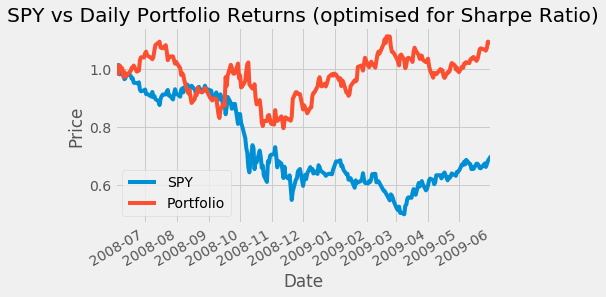

(array([0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 5.55111512e-16]),
 0.0883356070941339,
 0.0005518731169664713,
 0.02081975312504036,
 0.42078856958180566)

In [9]:

#obtain chart Start Date: 2008-06-01, End Date: 2009-06-01, Symbols: ['IBM', 'X', 'GLD', 'JPM'].
optimize_portfolio(sd=dt.datetime(2008,6,1), ed=dt.datetime(2009,6,1), \
    syms=['GOOG','AAPL','GLD','XOM'], gen_plot=True)